# Tenglo Channel Experiment
# Sinchronize CTD with ADCP track
Guto Schettini, revised 17.Jun.2025

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pickle

import rasterio
from rasterio.plot import show

In [2]:
# j = [time, longitude, latitude]
with open('ADCP_txy.pkl', 'rb') as io:
    adcp = pickle.load(io)
    
adcp_t = adcp[0]
adcp_lon = adcp[1]
adcp_lat = adcp[2]

adcp_t_n = mdates.date2num(adcp_t)

In [3]:
# ctd = [ctd_rdx_hdr, ctd_rdx]
with open('ctd_rdx.pkl', 'rb') as io:
    x = pickle.load(io)
    
hdr = x[0]
ctd = x[1]

In [4]:
s_lon = []
s_lat = []
for s in hdr:
    s = np.array(s)
    s_t = s[:,2] - datetime.timedelta(minutes = 58)
    s_t_n = mdates.date2num(s_t)
    
    s_lon.append(np.interp(s_t_n, adcp_t_n, adcp_lon))
    s_lat.append(np.interp(s_t_n, adcp_t_n, adcp_lat))

In [5]:
map_path = r'd:\GUTO\1_Trabs\1_Aestus\ChileTengloChannel\Base_Geografica\\'

basemap = rasterio.open(map_path + 'recorte_TengloChannel.tif')


In [6]:
# import matplotlib
# matplotlib.use('TkAgg')

(-41.5025, -41.49)

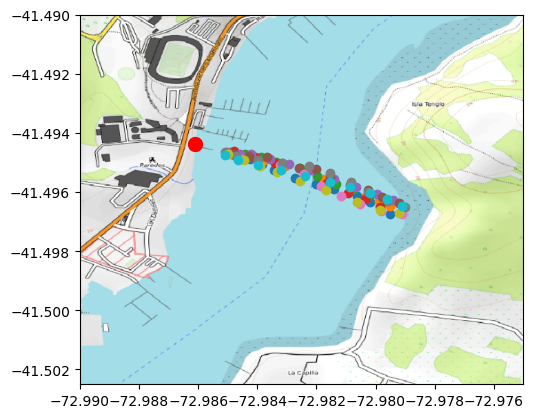

In [7]:
%matplotlib inline

# using ginput
pt_ref = np.array([-72.9860963,  -41.49438749])

ig, ax = plt.subplots()

for i in range(len(s)):
    ax.plot(s_lon[i], s_lat[i], 'o')
    
plt.plot(pt_ref[0], pt_ref[1], 'ro', ms=10)
show(basemap, ax=ax)
ax.set_xlim(-72.99, -72.975)
ax.set_ylim(-41.5025, -41.49)

# pt = plt.ginput()


In [8]:
distances = []
for i in range(len(s_lon)):
    dx = s_lon[i] - pt_ref[0]
    dy = s_lat[i] - pt_ref[1]
    dist = (dx**2 + dy**2)**.5 * 111120
    distances.append(dist)
    
with open('ctd_distances.pkl', 'wb') as io:
    pickle.dump(distances, io)

# Visual inspection of the fitting between CTD and ADCP
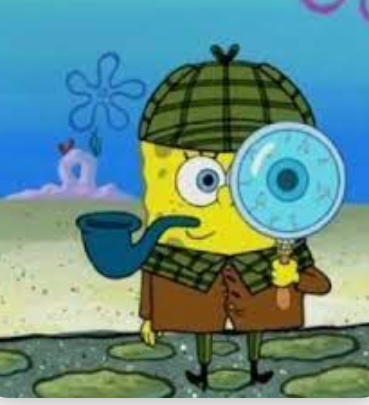

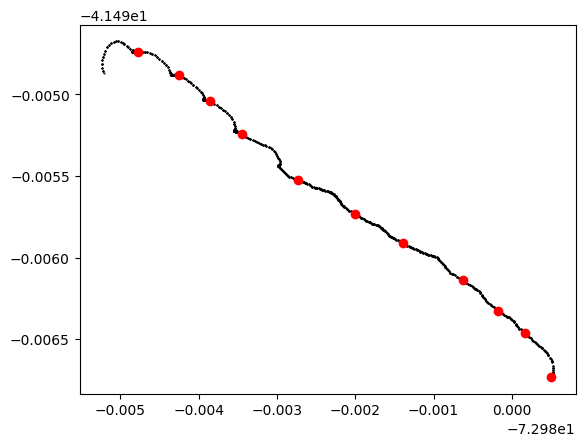

In [9]:
fig, ax = plt.subplots()

ini = 1650
fim = 3170

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[0], s_lat[0], 'or')


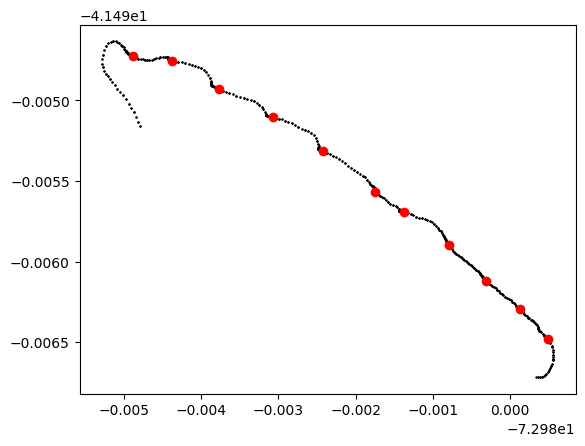

In [10]:
fig, ax = plt.subplots()

ini = 5750
fim = 7170

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[1], s_lat[1], 'or')


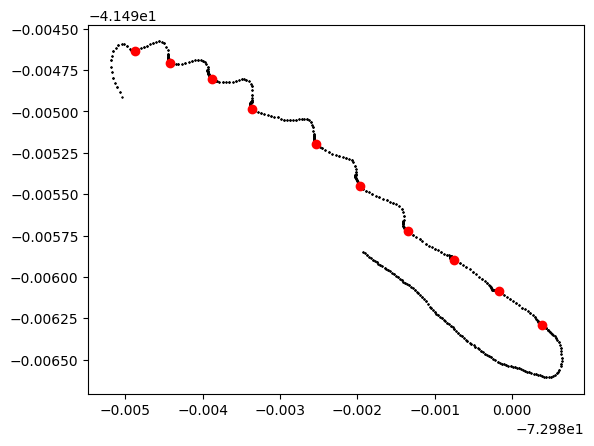

In [11]:
fig, ax = plt.subplots()

ini = 9750
fim = 11270

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[2], s_lat[2], 'or')

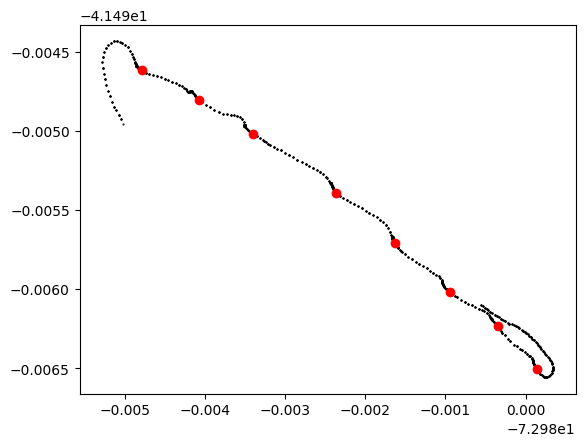

In [12]:
fig, ax = plt.subplots()

ini = 13900
fim = 15100

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[3], s_lat[3], 'or')

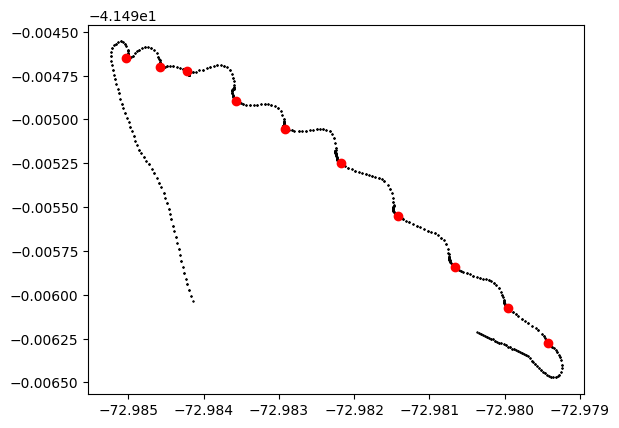

In [13]:
fig, ax = plt.subplots()

ini = 20500
fim = 22000

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[4], s_lat[4], 'or')

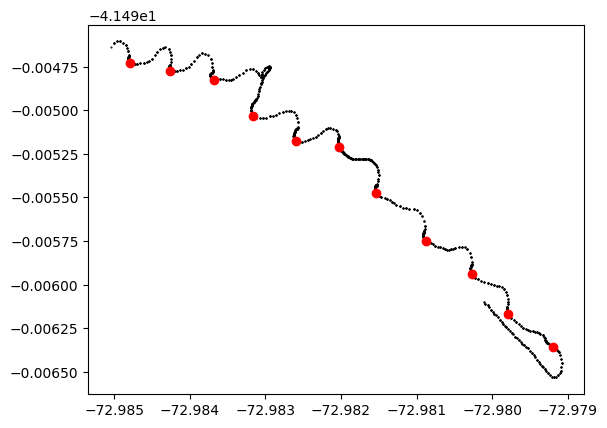

In [14]:
fig, ax = plt.subplots()

ini = 24500
fim = 26300

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[5], s_lat[5], 'or')

In [15]:
len(adcp_lon)

68140

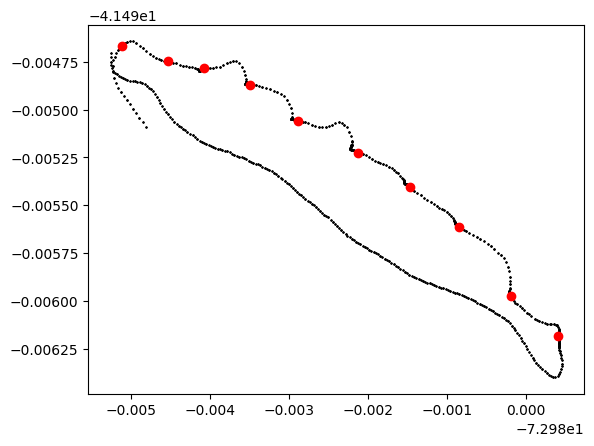

In [16]:
fig, ax = plt.subplots()

ini = 65000
fim = 67000

ax.plot(adcp_lon[ini:fim], adcp_lat[ini:fim], 'k.', ms=1)
ax.plot(s_lon[15], s_lat[15], 'or')